In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy

In [77]:
df=pd.read_csv('https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2001/results.csv')
df.head(10)

,division,name,city,gender,age,official,bib,overall,state,genderdiv,net,country
0,2 / 32,"Nietlispach, Franz",Zeiningen,M,43,91.37,W1,2 / 35,NaN,2 / 29,91.37,SUI
1,1 / 3254,"Ndereba, Catherine",Nairobi,F,28,143.88,F1,27 / 13408,NaN,1 / 4814,143.88,KEN
2,15 / 3945,"Lagat, Elijah",Nandi District,M,34,137.98,1,17 / 13408,NaN,17 / 8594,137.98,KEN
3,14 / 3945,"Abera, Gezahegne",Addis Ababa,M,22,137.07,2,16 / 13408,NaN,16 / 8594,137.07,ETH
4,3 / 32,"Frei, Heinz",Etziken,M,43,91.97,W2,3 / 35,NaN,3 / 29,91.97,SUI
5,5 / 3254,"Roba, Fatuma",Addis Ababa,F,27,148.13,F2,42 / 13408,NaN,5 / 4814,148.13,ETH
6,10 / 3945,"Tanui, Moses",Eldoret,M,35,135.08,3,12 / 13408,NaN,12 / 8594,135.08,KEN
7,1 / 32,"Van Dyk, Ernst F.",Stellenbosch,M,28,85.20,W3,1 / 35,NaN,1 / 29,85.20,RSA
8,4 / 3254,"Kiplagat, Lornah",Eldoret,F,26,147.93,F3,41 / 13408,NaN,4 / 4814,147.93,KEN
9,5 / 32,"Schabort, Krige",Cedartown,M,37,97.02,W4,5 / 35,GA,5 / 29,97.02,USA


In [78]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


In [79]:
df.dtypes

division      object
name          object
city          object
gender        object
age            int64
official     float64
bib           object
overall       object
state         object
genderdiv     object
net          float64
country       object
dtype: object

In [80]:
df.official = df.official.astype(int)

In [81]:
X = df[['age', 'official']]
y = df.age

/Users/amyscott/anaconda2/envs/nthinkfulpython/lib/python3.7/site-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  n_init=n_init)


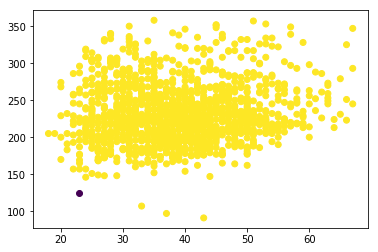

Comparing the assigned categories to the ones in the data:
col_0  1   2
age         
18     0   1
19     0   1
20     0   5
21     0   4
22     0  10
23     1  16
24     0  21
25     0  35
26     0  29
27     0  44
28     0  33
29     0  37
30     0  36
31     0  47
32     0  43
33     0  42
34     0  36
35     0  61
36     0  50
37     0  45
38     0  57
39     0  47
40     0  60
41     0  61
42     0  57
43     0  42
44     0  49
45     0  44
46     0  35
47     0  31
48     0  32
49     0  32
50     0  44
51     0  25
52     0  17
53     0  22
54     0  14
55     0  14
56     0  13
57     0   7
58     0   9
59     0   7
60     0   6
61     0   3
62     0   3
63     0   6
64     0   2
65     0   2
66     0   3
67     0   3


In [82]:
from sklearn.cluster import SpectralClustering
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

n_clusters=3

sc = SpectralClustering(n_clusters=n_clusters)

predict=sc.fit_predict(X_train)

plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))